In [4]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Replace with your actual CSV file path
df = pd.read_csv("crop_yield.csv")

In [6]:
print("Initial Shape:", df.shape)
print(df.head())

Initial Shape: (19689, 10)
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  


In [7]:
# ==============================
# 7. Feature Engineering - Dimensionality Reduction
# ==============================

# Recalculate numeric columns just in case
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Run PCA on scaled numeric features
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[numeric_cols])

# Save PCA results in dataframe
df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

print("Final Shape:", df.shape)
print(df[["PCA1", "PCA2"]].head())


Final Shape: (19689, 12)
           PCA1          PCA2
0 -1.665897e+07 -1.680601e+07
1 -1.681655e+07 -2.319787e+07
2 -1.683039e+07 -2.375364e+07
3  1.100869e+08 -2.405410e+07
4 -1.682814e+07 -2.366391e+07


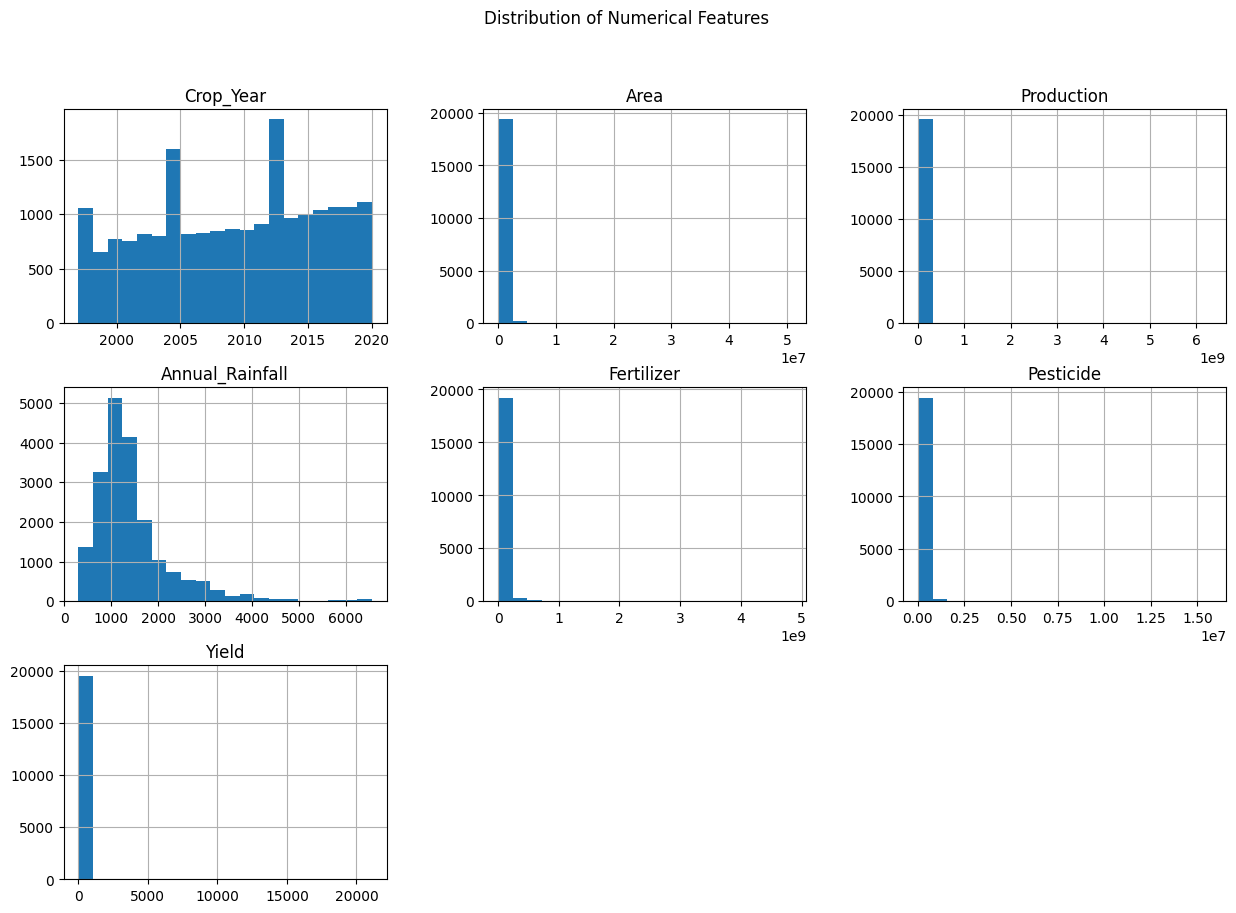

In [8]:
# 1. Distribution of numerical features
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

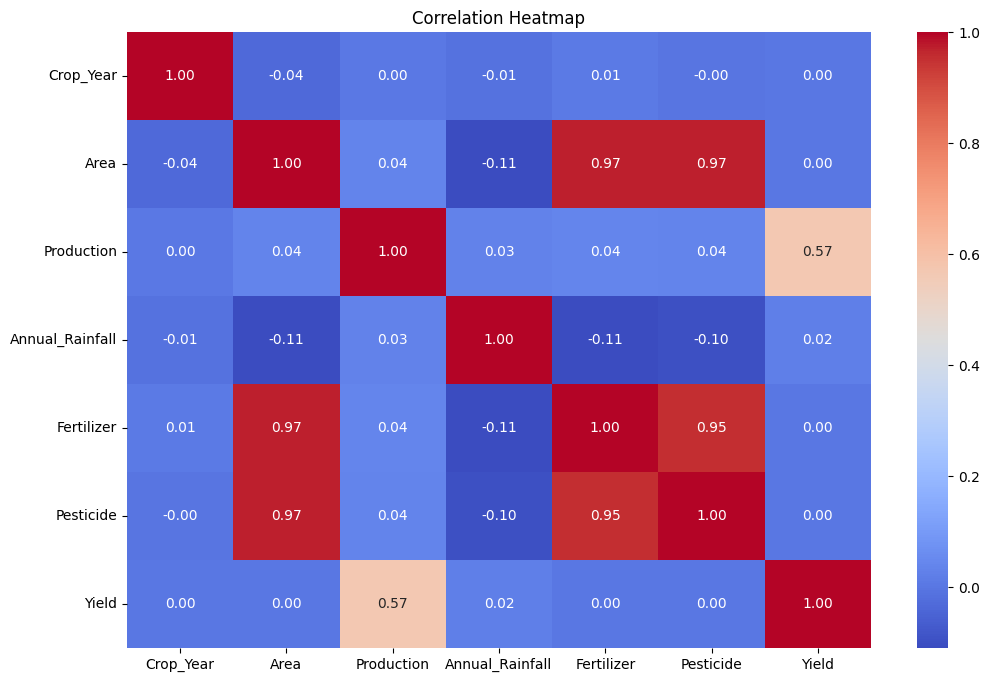

In [9]:
# 2. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

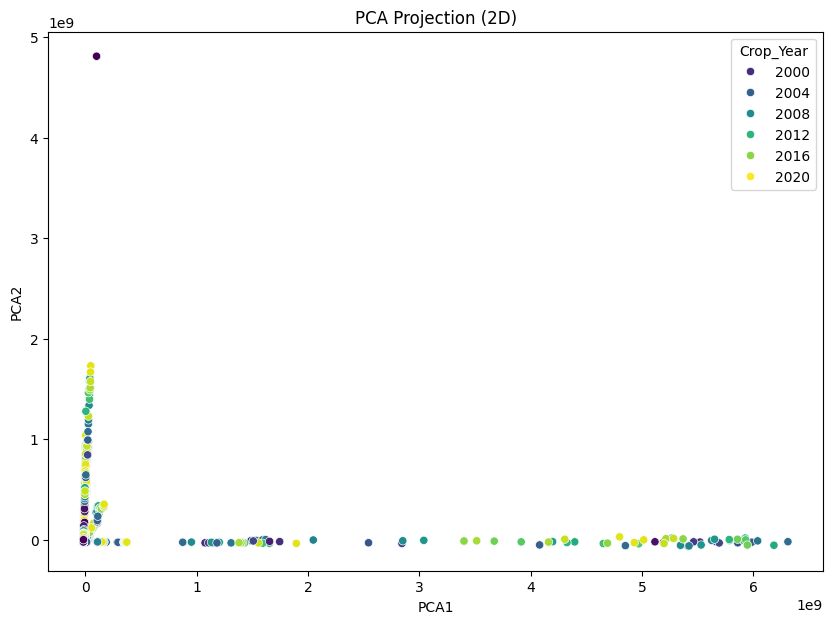

In [12]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="PCA1", y="PCA2", data=df, hue=numeric_cols[0], palette="viridis")
plt.title("PCA Projection (2D)")
plt.show()